# Exercise Week 13

### Exercise I:
Given the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1”. What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

scipy.stats contains objects that represent analytic distributions

In [1]:
# create a normal distribution  with parameters µ = 178 cm and σ = 7.7 cm for men
# use distribution.mean and standand variace to find out CDF of percentage of the U.S. male population is in this range
# male height between 5’10” and 6’1” hint: convert to centimeter.

In [16]:
import scipy.stats

mu, sigma = 178, 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)

# Convert feet and inch into cm
h1 = (5 * 30.48) + (10 * 2.54)
h2 = (6 * 30.48) + (11 * 2.54)

# P(5'10" < male_height < 6'11")
prob = dist.cdf(h2) - dist.cdf(h1)

print("Percent of US male: %f" %(prob * 100) + "%")

Percent of US male: 51.035086%


### Exercise II:
For small values of __n__, we don’t expect an empirical distribution to fit an __analytic distribution exactly__. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

We will look at the interarrival time of births. On December 18, 1997, 44 babies were born in a hospital in Brisbane, Australia

We plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points.

To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

__Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.__

In [27]:
import analytic
import thinkstats2
import random
import numpy as np

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf_from_data = thinkstats2.Cdf(diffs, label="actual")

n = len(diffs)
lam = 44.0 / 24 / 60 
sample = [random.expovariate(lam) for _ in range(n)]

1 / lam, np.mean(sample)
print(np.mean(diffs)) # mean of actual data = 1 / lambda

# how to create model's cdf?
model = thinkstats2.Cdf(sample, label="model")

33.25581395348837


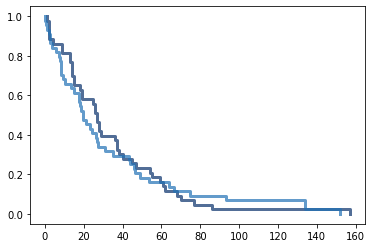

In [28]:
import thinkplot

thinkplot.Cdfs([cdf_from_data, model], complement=True)